In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("customer.csv")

In [34]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,Yes,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,Yes,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,Yes,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,1,Yes,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Yes,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,Yes,2,0,2,2,2,2,One year,1,Mailed check,84.80,1990.5,0
7039,0,0,1,1,72,1,2,Yes,0,2,2,0,2,2,One year,1,Credit card (automatic),103.20,7362.9,0
7040,0,0,1,1,11,0,1,Yes,2,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,2,Yes,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [4]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
columns_to_encode=df.columns.difference(["SeniorCitizen","tenure","MonthlyCharges","Churn","TotalCharges"])
df_one=pd.get_dummies(df,columns=columns_to_encode,drop_first=True)
df_one.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,customerID_9978-HYCIN,customerID_9979-RGMZT,customerID_9985-MWVIX,customerID_9986-BONCE,customerID_9987-LUTYD,customerID_9992-RRAMN,customerID_9992-UJOEL,customerID_9993-LHIEB,customerID_9995-HOTOH,gender_Male
0,0,1,29.85,29.85,No,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,1889.5,No,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,0,2,53.85,108.15,Yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,1840.75,No,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,0,2,70.70,151.65,Yes,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
columns_to_encode=["gender",'Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
label_encoder=LabelEncoder()
for column in columns_to_encode:
    df[column]=label_encoder.fit_transform(df[column])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,2,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,DSL,2,...,2,2,2,2,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,Fiber optic,0,...,2,0,2,2,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,DSL,2,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [8]:
df.replace(" ",np.nan, inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

In [9]:
df.drop('customerID',axis=1,inplace=True)

In [10]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [11]:
df.replace('DSL','Yes',inplace=True)
df.replace('Fiber optic','Yes',inplace=True)

In [12]:
df1= pd.get_dummies(data=df,columns=["InternetService","Contract","PaymentMethod"])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_No', 'InternetService_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [13]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_No,InternetService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,2,0,...,0,False,True,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,2,0,2,...,0,False,True,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,2,2,0,...,1,False,True,True,False,False,False,False,False,True
3,1,0,0,0,45,0,1,2,0,2,...,0,False,True,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,1,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,2,0,2,...,0,False,True,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,2,0,2,2,...,0,False,True,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,1,2,0,0,...,0,False,True,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,2,0,0,0,...,1,False,True,True,False,False,False,False,False,True


In [14]:
df2 = df1.replace({True: 1, False: 0})

C:\Users\ERGÜL\AppData\Local\Temp\ipykernel_18864\128479348.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df1.replace({True: 1, False: 0})


In [15]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_No,InternetService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,2,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,2,0,2,...,0,0,1,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,2,2,0,...,1,0,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,2,0,2,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,2,0,2,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,2,0,2,2,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,2,0,0,...,0,0,1,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,2,0,0,0,...,1,0,1,1,0,0,0,0,0,1


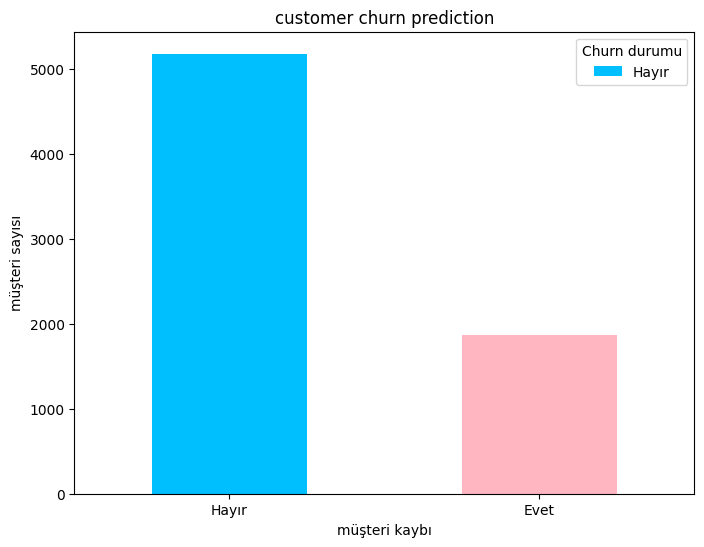

In [16]:
plt.figure(figsize=(8, 6))
df2["Churn"].value_counts().plot(kind="bar", color=["deepskyblue", "lightpink"])
plt.title("customer churn prediction")
plt.xlabel("müşteri kaybı")
plt.ylabel("müşteri sayısı")
plt.xticks([0, 1], ["Hayır", "Evet"], rotation=0)
plt.legend(["Hayır", "Evet"], title="Churn durumu")
plt.show()

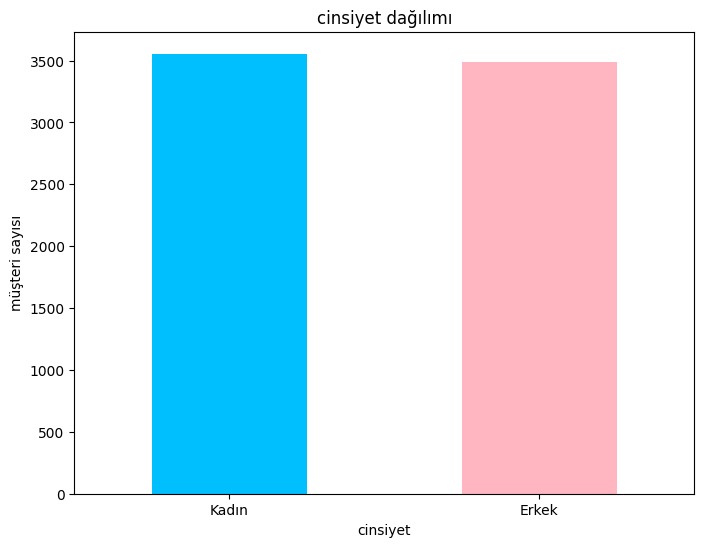

In [17]:
plt.figure(figsize=(8, 6))
df2["gender"].value_counts().plot(kind="bar", color=["deepskyblue", "lightpink"])
plt.title("cinsiyet dağılımı")
plt.xlabel("cinsiyet")
plt.ylabel("müşteri sayısı")
plt.xticks([0, 1], ["Kadın", "Erkek"], rotation=0)
plt.show()

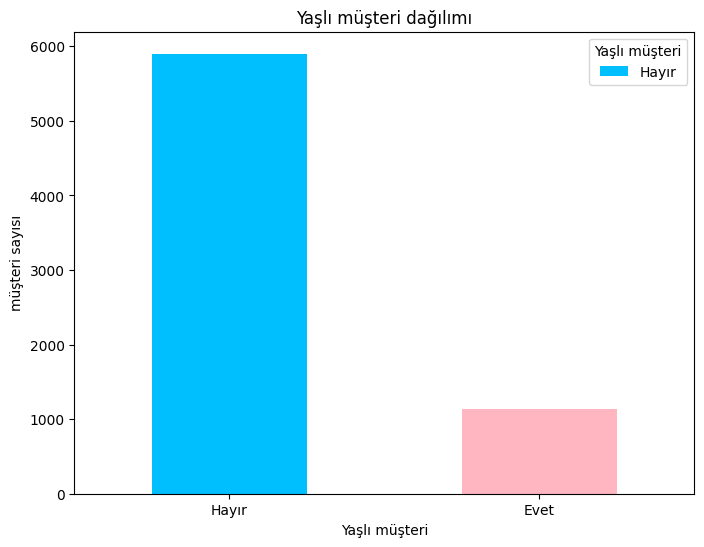

In [18]:
plt.figure(figsize=(8, 6))
df2["SeniorCitizen"].value_counts().plot(kind="bar", color=["deepskyblue", "lightpink"])
plt.title("Yaşlı müşteri dağılımı")
plt.xlabel("Yaşlı müşteri")
plt.ylabel("müşteri sayısı")
plt.xticks([0, 1], ["Hayır", "Evet"], rotation=0)
plt.legend(["Hayır", "Evet"], title="Yaşlı müşteri")
plt.show()

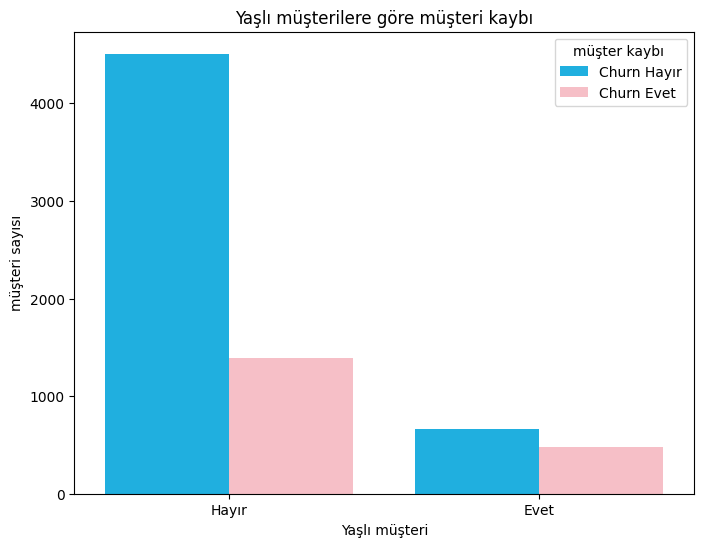

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x="SeniorCitizen",hue="Churn",data=df2, palette=["deepskyblue", "lightpink"])
plt.title("Yaşlı müşterilere göre müşteri kaybı")
plt.xlabel("Yaşlı müşteri")
plt.ylabel("müşteri sayısı")
plt.xticks([0, 1], ["Hayır", "Evet"], rotation=0)
plt.legend(["Churn Hayır", "Churn Evet"], title="müşter kaybı ")
plt.show()

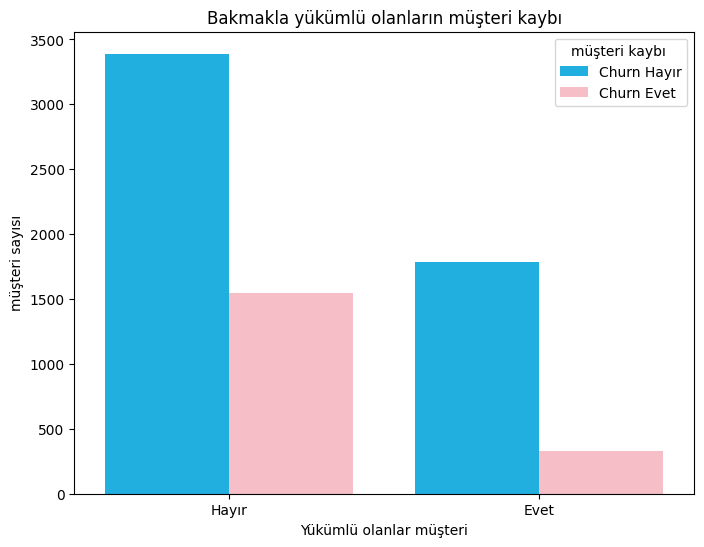

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Dependents",hue="Churn",data=df2, palette=["deepskyblue", "lightpink"])
plt.title("Bakmakla yükümlü olanların müşteri kaybı")
plt.xlabel("Yükümlü olanlar müşteri")
plt.ylabel("müşteri sayısı")
plt.xticks([0, 1], ["Hayır", "Evet"], rotation=0)
plt.legend(["Churn Hayır", "Churn Evet"], title="müşteri kaybı ")
plt.show()

In [21]:
df2.corr()["Churn"].sort_values()

tenure                                    -0.352229
Contract_Two year                         -0.302253
OnlineSecurity                            -0.289309
TechSupport                               -0.282492
InternetService_No                        -0.227890
TotalCharges                              -0.198335
OnlineBackup                              -0.195525
DeviceProtection                          -0.178134
Contract_One year                         -0.177820
Dependents                                -0.164221
Partner                                   -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
StreamingMovies                           -0.038492
StreamingTV                               -0.036581
gender                                    -0.008612
PhoneService                               0.011942
MultipleLines                              0.038037
SeniorCitize

In [22]:
df2["Churn"]=df["Churn"].map({"No":0,"Yes":1})

In [23]:
dfLabel=df2.copy()

In [24]:
dfLabel

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_No,InternetService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,2,0,...,NaN,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,2,0,2,...,NaN,0,1,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,2,2,0,...,NaN,0,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,2,0,2,...,NaN,0,1,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,NaN,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,2,0,2,...,NaN,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,2,0,2,2,...,NaN,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,2,0,0,...,NaN,0,1,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,2,0,0,0,...,NaN,0,1,1,0,0,0,0,0,1


In [25]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_No,InternetService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,2,0,...,NaN,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,2,0,2,...,NaN,0,1,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,2,2,0,...,NaN,0,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,2,0,2,...,NaN,0,1,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,NaN,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,2,0,2,...,NaN,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,2,0,2,2,...,NaN,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,2,0,0,...,NaN,0,1,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,2,0,0,0,...,NaN,0,1,1,0,0,0,0,0,1


In [26]:
features = df2.drop("Churn",axis=1)
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)
df2_scaled=pd.DataFrame(features_scaled,columns=features.columns)
df2_scaled["Churn"]=df["Churn"]
df2_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No,InternetService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-0.918838,1.242550,-1.027910,...,-0.525927,0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,0
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,1.407321,-1.029919,1.245111,...,-0.525927,0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,0
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,1.407321,1.242550,-1.027910,...,-0.525927,0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,1
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,1.407321,-1.029919,1.245111,...,-0.525927,0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,0
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-0.918838,-1.029919,-1.027910,...,-0.525927,0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,1


In [27]:
from sklearn.model_selection import train_test_split
X=df2_scaled.drop("Churn" ,axis=1)
y=df2_scaled["Churn"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int32

In [38]:
print("Eğitim Özellikleri:")
print(X_train)
print("Test Özellikleri:")
print(X_test)

Eğitim Özellikleri:
        gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
2142 -1.009559      -0.439916 -0.966622    1.529024 -0.463037      0.327438   
1623 -1.009559      -0.439916 -0.966622   -0.654012  0.880735      0.327438   
6074  0.990532      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1362  0.990532      -0.439916 -0.966622   -0.654012 -1.155283      0.327438   
6754  0.990532      -0.439916 -0.966622    1.529024 -1.318165      0.327438   
...        ...            ...       ...         ...       ...           ...   
3772  0.990532      -0.439916  1.034530   -0.654012 -1.277445      0.327438   
5191 -1.009559      -0.439916  1.034530    1.529024 -0.381597      0.327438   
5226  0.990532      -0.439916  1.034530    1.529024 -0.829521      0.327438   
5390  0.990532       2.273159 -0.966622   -0.654012 -0.829521      0.327438   
860   0.990532      -0.439916 -0.966622   -0.654012 -0.259435      0.327438   

      MultipleLines  OnlineSecu

In [30]:
model = LogisticRegression(random_state=42) 
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Model Coefficients:")
print(model.coef_)

print("Model Intercept:")
print(model.intercept_)

print("XGBoost")

Confusion Matrix:
[[931 105]
 [149 224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Model Coefficients:
[[-0.02615077  0.05929926  0.02808307 -0.07361761 -1.36538921 -0.33491223
   0.04978423 -0.25681043 -0.1478065  -0.07978787 -0.22228142 -0.04933583
  -0.00432389  0.16621758  0.82449238  0.66402144  0.16040554 -0.16040554
   0.3118429  -0.01275381 -0.35076374 -0.02910754 -0.0642534   0.12036112
  -0.04368971]]
Model Intercept:
[-1.7059622]
XGBoost


In [35]:
confusion_matrix(y_test, y_pred)

classification_report(y_test, y_pred)

model.coef_

model.intercept_

"XGBoost"

'XGBoost'